In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data.reset_index(drop = True,inplace = True)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [5]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [6]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876,1.0


In [7]:
x1 = []
x2 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格']].values)
    x2.append(data.loc[i:(i+4)][['论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [8]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],1)
x2.shape

(2430, 5, 1)

In [9]:
x1_train = x1[:1944]
x2_train = x2[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
x2_test  = x2[1944:]
y_test  = y[1944:]

In [10]:
from sklearn import metrics

MSE = 0
RMSE = 0
MAE = 0
MAPE = 0
df = pd.DataFrame(y_test,columns=['truth'])

for i in range(5):
    from keras.models import Sequential
    from keras.layers import Input, Dense, GRU, concatenate, multiply
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.models import Model

    model1 = Sequential()
    input1 = Input(shape=(5,1))
    model1 = Dense(200, activation='relu')(input1)
    model1 = GRU(units=200)(model1)
    model1 = (Dense(2000, activation="relu"))(model1)
    model1 = (Dense(200, activation="relu"))(model1)

    model2 = Sequential()
    input2 = Input(shape=(5,1))
    model2 = Dense(200, activation='relu')(input2)
    model2 = GRU(units=200)(model2)
    model2 = (Dense(2000, activation="relu"))(model2)
    model2 = (Dense(200, activation="relu"))(model2)

    conc = multiply([model1, model2])

    conc2 = (Dense(20, activation="relu"))(conc)
    out = (Dense(1, activation="linear"))(conc2)
    model = Model([input1, input2], out)
    model.summary()

    from keras.optimizers import Adam
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss = 'mean_squared_error')
    model.fit([x1_train,x2_train],y_train,
                epochs=300,
                batch_size=256,
                validation_data=([x1_test,x2_test], y_test),
                verbose=1)

    pred = model.predict([x1_test,x2_test])
    pred = pred.ravel()
    df0 = pd.DataFrame(pred,columns=['pred'])
    df = pd.concat([df, df0], axis=1)
    MSE = MSE + metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
    RMSE = RMSE + np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
    MAE = MAE + np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
    MAPE = MAPE + np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))

MSE = MSE/5
RMSE = RMSE/5
MAE = MAE/5
MAPE = MAPE/5

print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 5, 200)            │             400 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru (GRU)                     │ (None, 200)               │         241,200 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_1 (GRU)                   │ (None, 200)               │         241,200 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 2000)              │         402,000 │ gru[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 2000)              │         402,000 │ gru_1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 200)               │         400,200 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 200)               │         400,200 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 200)               │               0 │ dense_2[0][0],             │
│                               │                           │                 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 20)                │           4,020 │ multiply[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │              21 │ dense_6[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,091,641 (7.98 MB)

 Trainable params: 2,091,641 (7.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 32.6678 - val_loss: 37.2811
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 32.1065 - val_loss: 35.9712
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 30.0668 - val_loss: 31.7516
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 23.8587 - val_loss: 20.3810
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 10.6486 - val_loss: 11.8252
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 8.0667 - val_loss: 10.6252
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 5.5284 - val_loss: 11.1027
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 5.4012 - val_loss: 8.9000
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 4.9175 - val_loss: 8.2730
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 4.4667 - val_loss: 8.0759
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 3.9095 - val_loss: 7.0003
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 3.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0065 - val_loss: 0.0358
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0066 - val_loss: 0.0372
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0063 - val_loss: 0.0373
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0064 - val_loss: 0.0389
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0063 - val_loss: 0.0378
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0063 - val_loss: 0.0340
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0064 - val_loss: 0.0323
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0063 - val_loss: 0.0314
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0064 - val_loss: 0.0300
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0064 - val_loss: 0.0319
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0063 - val_loss: 0.0351
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0062 - val_loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0043 - val_loss: 0.0231
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0043 - val_loss: 0.0255
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0044 - val_loss: 0.0226
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0042 - val_loss: 0.0249
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0041 - val_loss: 0.0233
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0042 - val_loss: 0.0260
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0041 - val_loss: 0.0313
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0045 - val_loss: 0.0278
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0042 - val_loss: 0.0223
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0041 - val_loss: 0.0239
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0039 - val_loss: 0.0242
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0039 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0024 - val_loss: 0.0132
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0024 - val_loss: 0.0136
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0025 - val_loss: 0.0138
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0023 - val_loss: 0.0123
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0023 - val_loss: 0.0126
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0023 - val_loss: 0.0163
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0023 - val_loss: 0.0101
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0024 - val_loss: 0.0178
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0025 - val_loss: 0.0101
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0024 - val_loss: 0.0175
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0024 - val_loss: 0.0105
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0024 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0012 - val_loss: 0.0078
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0011 - val_loss: 0.0078
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012 -

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_3 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_2 (GRU)                   │ (None, 200)               │         241,200 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_3 (GRU)                   │ (None, 200)               │         241,200 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 2000)              │         402,000 │ gru_2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 2000)              │         402,000 │ gru_3[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 200)               │         400,200 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 200)               │         400,200 │ dense_12[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_1 (Multiply)         │ (None, 200)               │               0 │ dense_10[0][0],            │
│                               │                           │                 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 20)                │           4,020 │ multiply_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 1)                 │              21 │ dense_14[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,091,641 (7.98 MB)

 Trainable params: 2,091,641 (7.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 32.6976 - val_loss: 37.4552
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 32.4009 - val_loss: 36.8011
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 31.3592 - val_loss: 34.6980
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 28.3087 - val_loss: 28.4174
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 19.6519 - val_loss: 14.5137
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 7.1906 - val_loss: 11.0250
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 6.8357 - val_loss: 10.4244
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 5.4751 - val_loss: 9.6967
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 4.7915 - val_loss: 8.0160
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 4.4932 - val_loss: 7.6865
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 3.9082 - val_loss: 7.2852
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 3.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0068 - val_loss: 0.0354
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0067 - val_loss: 0.0390
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0066 - val_loss: 0.0374
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0066 - val_loss: 0.0384
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0066 - val_loss: 0.0428
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0067 - val_loss: 0.0367
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0064 - val_loss: 0.0395
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0064 - val_loss: 0.0359
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0063 - val_loss: 0.0370
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0061 - val_loss: 0.0315
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0064 - val_loss: 0.0330
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0063 - val_loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0042 - val_loss: 0.0228
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0042 - val_loss: 0.0255
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0042 - val_loss: 0.0251
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0041 - val_loss: 0.0265
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0042 - val_loss: 0.0228
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0041 - val_loss: 0.0232
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0041 - val_loss: 0.0239
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0039 - val_loss: 0.0270
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0040 - val_loss: 0.0202
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0041 - val_loss: 0.0212
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0039 - val_loss: 0.0271
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0040 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0023 - val_loss: 0.0150
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0022 - val_loss: 0.0133
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0022 - val_loss: 0.0127
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0023 - val_loss: 0.0131
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0022 - val_loss: 0.0146
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0023 - val_loss: 0.0113
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0023 - val_loss: 0.0154
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0022 - val_loss: 0.0113
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0022 - val_loss: 0.0151
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0021 - val_loss: 0.0128
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0021 - val_loss: 0.0161
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0022 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0011 - val_loss: 0.0077
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0012 - val_loss: 0.0079
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0011 - val_loss: 0.0058
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0011 - val_loss: 0.0058
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0010 - val_loss: 0.0058
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0011 -

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_4 (GRU)                   │ (None, 200)               │         241,200 │ dense_16[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_5 (GRU)                   │ (None, 200)               │         241,200 │ dense_19[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 2000)              │         402,000 │ gru_4[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 2000)              │         402,000 │ gru_5[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 200)               │         400,200 │ dense_17[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_21 (Dense)              │ (None, 200)               │         400,200 │ dense_20[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_2 (Multiply)         │ (None, 200)               │               0 │ dense_18[0][0],            │
│                               │                           │                 │ dense_21[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_22 (Dense)              │ (None, 20)                │           4,020 │ multiply_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 1)                 │              21 │ dense_22[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,091,641 (7.98 MB)

 Trainable params: 2,091,641 (7.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 32.6036 - val_loss: 37.1728
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 31.8323 - val_loss: 35.4024
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 29.1079 - val_loss: 29.7271
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 20.9759 - val_loss: 16.2044
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 7.9964 - val_loss: 12.6950
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 7.6184 - val_loss: 11.7803
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6.4180 - val_loss: 10.7785
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5.2114 - val_loss: 9.2192
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.9818 - val_loss: 8.8288
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.4109 - val_loss: 8.1145
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.2969 - val_loss: 7.1471
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.6

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0053 - val_loss: 0.0291
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0051 - val_loss: 0.0291
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0052 - val_loss: 0.0300
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0051 - val_loss: 0.0304
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0050 - val_loss: 0.0294
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0050 - val_loss: 0.0304
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0049 - val_loss: 0.0264
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0051 - val_loss: 0.0292
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0049 - val_loss: 0.0325
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0051 - val_loss: 0.0343
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0051 - val_loss: 0.0301
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0048 - val_loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0036 - val_loss: 0.0204
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0035 - val_loss: 0.0204
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0034 - val_loss: 0.0196
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0033 - val_loss: 0.0213
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0033 - val_loss: 0.0165
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0035 - val_loss: 0.0190
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0033 - val_loss: 0.0235
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0036 - val_loss: 0.0233
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0034 - val_loss: 0.0177
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0034 - val_loss: 0.0148
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0035 - val_loss: 0.0200
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0034 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0021 - val_loss: 0.0118
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0020 - val_loss: 0.0119
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0020 - val_loss: 0.0138
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0020 - val_loss: 0.0104
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0020 - val_loss: 0.0145
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0021 - val_loss: 0.0094
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0020 - val_loss: 0.0121
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0020 - val_loss: 0.0106
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0019 - val_loss: 0.0119
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0020 - val_loss: 0.0087
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0021 - val_loss: 0.0130
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0019 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0011 - val_loss: 0.0077
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0011 - val_loss: 0.0076
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0010 -

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_7 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_27 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_6 (GRU)                   │ (None, 200)               │         241,200 │ dense_24[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_7 (GRU)                   │ (None, 200)               │         241,200 │ dense_27[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 2000)              │         402,000 │ gru_6[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_28 (Dense)              │ (None, 2000)              │         402,000 │ gru_7[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 200)               │         400,200 │ dense_25[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 200)               │         400,200 │ dense_28[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_3 (Multiply)         │ (None, 200)               │               0 │ dense_26[0][0],            │
│                               │                           │                 │ dense_29[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 20)                │           4,020 │ multiply_3[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_31 (Dense)              │ (None, 1)                 │              21 │ dense_30[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,091,641 (7.98 MB)

 Trainable params: 2,091,641 (7.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 32.6890 - val_loss: 37.4604
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 32.3504 - val_loss: 36.7897
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 31.3622 - val_loss: 34.5426
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 27.8485 - val_loss: 27.5081
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 18.3021 - val_loss: 13.0142
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.1449 - val_loss: 11.3926
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.2607 - val_loss: 11.8952
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 5.5508 - val_loss: 10.2356
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.1171 - val_loss: 9.0050
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.7882 - val_loss: 8.8276
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.4778 - val_loss: 8.1470
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 3

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0065 - val_loss: 0.0401
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0067 - val_loss: 0.0404
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0066 - val_loss: 0.0396
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0065 - val_loss: 0.0383
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0065 - val_loss: 0.0412
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0065 - val_loss: 0.0444
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0066 - val_loss: 0.0410
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0064 - val_loss: 0.0355
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0063 - val_loss: 0.0352
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0064 - val_loss: 0.0356
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0063 - val_loss: 0.0355
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0062 - val_loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0043 - val_loss: 0.0260
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0043 - val_loss: 0.0238
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0042 - val_loss: 0.0217
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0043 - val_loss: 0.0267
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0042 - val_loss: 0.0255
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0042 - val_loss: 0.0249
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0042 - val_loss: 0.0254
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0042 - val_loss: 0.0251
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0041 - val_loss: 0.0258
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0041 - val_loss: 0.0293
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0042 - val_loss: 0.0300
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0044 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0026 - val_loss: 0.0166
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0025 - val_loss: 0.0141
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0024 - val_loss: 0.0153
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0024 - val_loss: 0.0141
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0024 - val_loss: 0.0126
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0024 - val_loss: 0.0165
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0024 - val_loss: 0.0115
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0024 - val_loss: 0.0113
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0024 - val_loss: 0.0147
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0023 - val_loss: 0.0145
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0023 - val_loss: 0.0136
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0022 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0014 - val_loss: 0.0093
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0013 - val_loss: 0.0083
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0012 - val_loss: 0.0088
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0011 -

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_9 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_35 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_8 (GRU)                   │ (None, 200)               │         241,200 │ dense_32[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_9 (GRU)                   │ (None, 200)               │         241,200 │ dense_35[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 2000)              │         402,000 │ gru_8[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_36 (Dense)              │ (None, 2000)              │         402,000 │ gru_9[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 200)               │         400,200 │ dense_33[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_37 (Dense)              │ (None, 200)               │         400,200 │ dense_36[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_4 (Multiply)         │ (None, 200)               │               0 │ dense_34[0][0],            │
│                               │                           │                 │ dense_37[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 20)                │           4,020 │ multiply_4[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_39 (Dense)              │ (None, 1)                 │              21 │ dense_38[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,091,641 (7.98 MB)

 Trainable params: 2,091,641 (7.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 32.5945 - val_loss: 37.1109
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 31.7462 - val_loss: 35.2925
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 29.0125 - val_loss: 29.6276
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 21.0632 - val_loss: 16.0973
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 7.7971 - val_loss: 12.2077
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.6613 - val_loss: 11.1548
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5.9791 - val_loss: 10.4264
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 4.9807 - val_loss: 8.6446
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 4.6191 - val_loss: 8.2572
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.3162 - val_loss: 7.6885
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.9405 - val_loss: 6.7386
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.4

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0054 - val_loss: 0.0322
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0052 - val_loss: 0.0286
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0053 - val_loss: 0.0280
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0052 - val_loss: 0.0279
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0052 - val_loss: 0.0276
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0053 - val_loss: 0.0313
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0051 - val_loss: 0.0322
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0052 - val_loss: 0.0313
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0050 - val_loss: 0.0267
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0052 - val_loss: 0.0283
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0051 - val_loss: 0.0322
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0049 - val_loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0038 - val_loss: 0.0247
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0038 - val_loss: 0.0205
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0036 - val_loss: 0.0202
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0036 - val_loss: 0.0241
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0037 - val_loss: 0.0244
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0036 - val_loss: 0.0230
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0037 - val_loss: 0.0181
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0036 - val_loss: 0.0183
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0036 - val_loss: 0.0206
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0035 - val_loss: 0.0241
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0035 - val_loss: 0.0188
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0036 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0022 - val_loss: 0.0152
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0022 - val_loss: 0.0126
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0022 - val_loss: 0.0129
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0022 - val_loss: 0.0127
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0021 - val_loss: 0.0145
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0021 - val_loss: 0.0123
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0021 - val_loss: 0.0115
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0021 - val_loss: 0.0129
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0021 - val_loss: 0.0136
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0021 - val_loss: 0.0126
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0021 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0013 - val_loss: 0.0068
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0013 - val_loss: 0.0078
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0013 - val_loss: 0.0099
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0012 - val_loss: 0.0087
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0012 -

,truth,pred,pred,pred,pred,pred
0,5.969168,5.916553,5.935447,5.937622,5.927688,5.933182
1,5.965018,5.918329,5.936144,5.939870,5.925626,5.935574
2,5.969270,5.921741,5.936267,5.935858,5.932128,5.936950
3,5.971262,5.926322,5.941406,5.940068,5.937083,5.941927
4,5.970037,5.928778,5.942855,5.943005,5.938506,5.943027
...,...,...,...,...,...,...
481,6.327830,6.230998,6.246446,6.245560,6.235337,6.241735
482,6.317490,6.224530,6.239920,6.239005,6.229327,6.235589
483,6.320876,6.217186,6.232543,6.231667,6.222264,6.228458
484,6.320948,6.214165,6.229514,6.228684,6.219174,6.225398


In [11]:
df.to_csv('./data/GRU+修正论坛情绪值-预测值.csv',header=True,index=False)

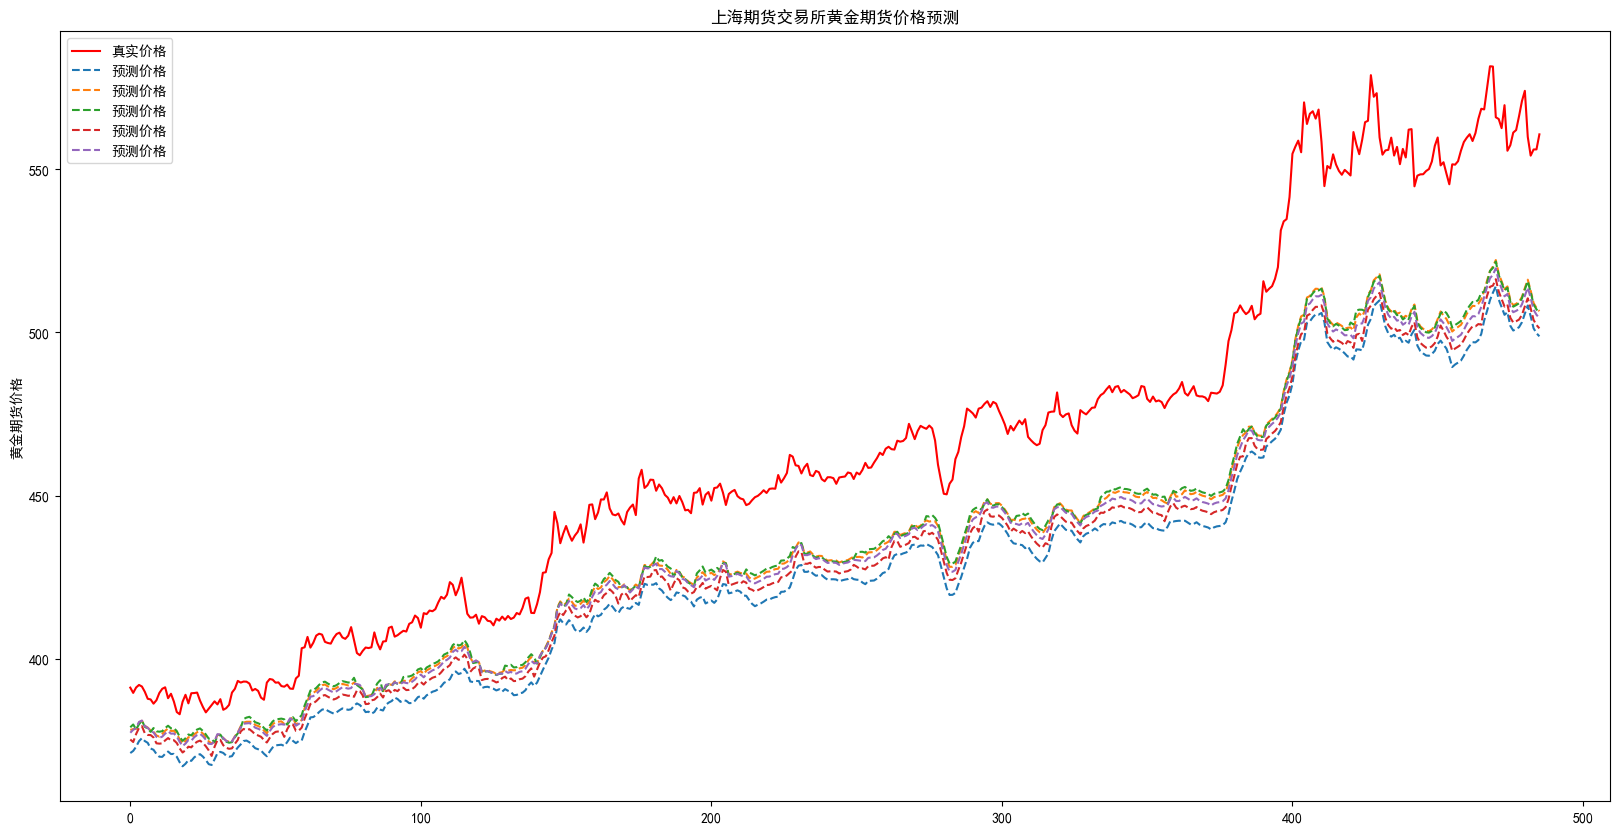

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()